# Aircraft longitudinal dynamics/

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

State representation of the longitudinal dynamics
$$
\begin{vmatrix}
\dot{u} \\ \dot{w} \\ \dot{q} \\ \dot{\theta}
\end{vmatrix}
= 
\begin{vmatrix}
\frac{\partial{X}}{\partial{u}} & \frac{\partial{X}}{\partial{w}} & \frac{\partial{X}}{\partial{q}} & \frac{\partial{X}}{\partial{\theta}} \\ 
\frac{\partial{Z}}{\partial{u}} & \frac{\partial{Z}}{\partial{w}} & \frac{\partial{Z}}{\partial{q}} & \frac{\partial{Z}}{\partial{\theta}} \\ 
\frac{\partial{M}}{\partial{u}} & \frac{\partial{M}}{\partial{w}} & \frac{\partial{M}}{\partial{q}} & \frac{\partial{M}}{\partial{\theta}} \\ 
0 & 0 & 0 & 1
\end{vmatrix}
\begin{vmatrix}
u \\ w \\ q \\ \theta
\end{vmatrix}
+ \begin{vmatrix}
\frac{\partial{X}}{\partial{\delta_e}} \\ \frac{\partial{Z}}{\partial{\delta_e}} \\ \frac{\partial{M}}{\partial{\delta_e}} \\ \frac{\partial{\theta}}{\partial{\delta_e}}
\end{vmatrix}
$$
$$
y = C \vec{X} + D =
\begin{vmatrix}
0 & 0 & 0 & 1
\end{vmatrix}
 \vec{X} = \theta
$$
The only output we are interested in is the pitch angle $\theta$.

In [2]:
A = np.array([[-0.045, 0.036, 0.0, -32.2],
             [-0.369, -2.02, 176.0, 0.0],
             [0.0019, -0.0396, -2.948, 0.0],
             [0.0, 0.0, 1.0, 0.0]])

B = np.array([0, -10, -2.8, 0]).reshape(4,1)

C = np.array([0, 0, 0, 180.0/3.14159])

D = np.array([0])

In [3]:
state_space_system = signal.StateSpace(A, B, C, D)

The eigenvalues of the matrix A is also equal to the poles of the system.

In [5]:
state_space_system.poles

array([-2.48945125+2.59776377j, -2.48945125-2.59776377j,
       -0.01704875+0.21354412j, -0.01704875-0.21354412j])

In [6]:
state_space_system.poles[0] * state_space_system.poles[1], state_space_system.poles[0] + state_space_system.poles[1]

((12.945744134387773+0j), (-4.978902502919805+0j))

In [7]:
np.sum(state_space_system.poles[0:2])*2

(-9.95780500583961+0j)

Phugoid frequency $f_{ph}$ and damping ratio $\zeta_{ph}$

In [8]:
w_nph = np.sqrt(state_space_system.poles[2]*state_space_system.poles[3])
zeta_ph = np.sum(state_space_system.poles[2:])/w_nph/2
f_ph = 2*3.14159/(w_nph*np.sqrt(1-zeta_ph**2))
f_ph.real, zeta_ph.real

(29.423333820414808, -0.07958389414693409)

$$ f_p = 29.4s $$
$$ \zeta_p = -0.080 $$
The timing between each peak of the oscillation is 29.4s and the decay of the oscillation is rather slow with a damping ratio of -0.080.

Short period oscillation frequency $f_{sp}$ and damping ratio $\zeta_{sp}$

In [9]:
w_nsp = np.sqrt(state_space_system.poles[0]*state_space_system.poles[1])
zeta_sp = np.sum(state_space_system.poles[0:2])/w_nsp/2
f_sp = 2*3.14159/(w_nsp*np.sqrt(1-zeta_sp**2))
f_sp, zeta_sp

((2.4186879785983852+0j), (-0.6918948798179853+0j))

$$ f_p = 2.42s $$
$$ \zeta_p = -0.692 $$

The frequency is rather fast, resembling those found on GA aircrafts, and the damping ratio is high and is typically what we can expect.

Now, let's create a momentory input of 0.5s on the elevator, close to full deflection, to see the pitch angle response. Angle of the input on the elevator is in radian.

In [10]:
u_input = np.zeros((1000,1))
u_input[0:5] = -0.5

Use a vector T for time, 0 to 100s with 0.1s increments

In [11]:
T = np.arange(0, 100, 0.1)
t, theta, x = signal.lsim(state_space_system, U=u_input, T=T)

(-1, 1)

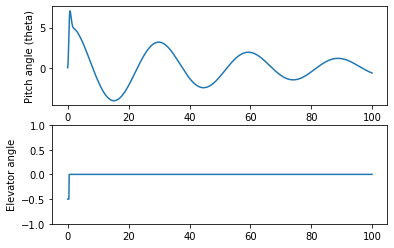

In [12]:
fig, axs = plt.subplots(2)

axs[0].plot(t, theta)
axs[0].set(xlabel='Time (s)', ylabel='Pitch angle (theta)')

axs[1].plot(t, u_input)
axs[1].set(ylabel='Elevator angle', )
axs[1].set_ylim((-1, 1))

We clearly see above the phugoid oscillation which has a frequency of about 30s. There is a decay in the oscillation but it's a rather slow decay. The first few seconds looks interesting. Let's zoom of the first 15 seconds.

(0, 15)

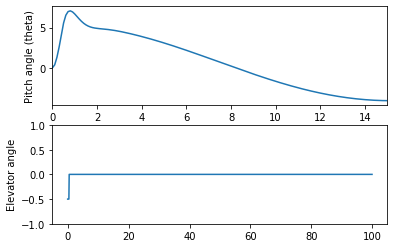

In [13]:
fig, axs = plt.subplots(2)

axs[0].plot(t, theta)
axs[0].set(xlabel='Time (s)', ylabel='Pitch angle (theta)')
axs[0].set_xlim((0,15))

axs[1].plot(t, u_input)
axs[1].set(ylabel='Elevator angle', )
axs[1].set_ylim((-1, 1))
axs[0].set_xlim((0,15))

Before the start of the phugoid oscillation, we can observe another oscillation with a higher frequency which decays faster. This is the short period oscillation.